In [12]:
# -*- coding: utf-8 -*-
"""HW7_try3_mapsize100.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1WmpDUD9U9JvwV0y7PqSRqHop-f8LRzdv

# Import library
"""

import random as rnd
import numpy as np
from math import *
import matplotlib.pyplot as plt


"""# Fx: Gen random row ,col"""

def gen_rnd_pos( map_width, num_point): #return list of [row, col]
    indices = np.random.choice(map_width*map_width, num_point , replace=False)
    points = np.unravel_index(indices, (map_width, map_width))
    p_row, p_col = points
    row_col_lst = np.array(list(zip(p_row, p_col)))
    return row_col_lst



"""## Generate People list"""

## Create people: list of person object, each person object: row, col, talent, wealth_history
class Person:
    def __init__(self, row, col, talent , capital, good_events_history, bad_events_history, wealth_history = [10] ):
        self.row = row
        self.col = col
        self.talent = talent
        self.capital = capital
        self.good_events_history = []
        self.bad_events_history = []
        self.wealth_history = wealth_history




"""# Create Direction Table reference"""

direction_ref = {
    1: [-2, -2],
    2: [-2, -1],
    3: [-2, 0],
    4: [-2, 1],
    5: [-2, 2],
    6: [-1, -2],
    7: [-1, -1],
    8: [-1, 0],
    9: [-1, 1],
    10: [-1, 2],
    11: [0, -2],
    12: [0, -1],
    13: [0, 0],
    14: [0, 1],
    15: [0, 2],
    16: [1, -2],
    17: [1, -1],
    18: [1, 0],
    19: [1, 1],
    20: [1, 2],
    21: [2, -2],
    22: [2, -1],
    23: [2, 0],
    24: [2, 1],
    25: [2, 2]
}



"""## Resolve index for toroidal"""

def resolve_index( width, before_index ):
    if before_index < 0:
        s = -before_index
        return width - s
    elif before_index > width-1:
        s = before_index - (width -1)
        return -1 + s
    else:
        return before_index

"""## Move Event function"""

# param:
def move( map, pos_list, map_size):
    for i in range(len(pos_list)):
        move_choice = rnd.randint(1,25)

        #debug
#         print(f'move_choice: {move_choice}')
        map[pos_list[i][0], pos_list[i][1]] -= 1
        pos_list[i][0] = resolve_index(MAP_SIZE, pos_list[i][0] + direction_ref[move_choice][0] )
        pos_list[i][1] = resolve_index(MAP_SIZE, pos_list[i][1] + direction_ref[move_choice][1] )
        map[pos_list[i][0], pos_list[i][1]] += 1


"""# Fx: Capital update"""

def capital_update( good_num_map, bad_num_map):
    for i in range(len(people_list)):
        good_num = good_num_map[people_list[i].row][ people_list[i].col]
        bad_num = bad_num_map[people_list[i].row] [people_list[i].col]

        people_list[i].good_events_history.append(good_num)
        people_list[i].bad_events_history.append(-1*bad_num)

        for j in range(good_num):
            u = rnd.uniform(0,1)

            #debug
            #print(f'u:{type(u)},peoplelst[i]:{people_list[i]}, talent:{type(people_list[i].talent)}')

            people_list[i].capital = people_list[i].capital * 2 if u <= people_list[i].talent else people_list[i].capital
        for k in range(bad_num):
            u = rnd.uniform(0,1)
            people_list[i].capital *= 0.5
            #people_list[i].capital = people_list[i].capital * 0.5 if u >= people_list[i].talent else people_list[i].capital



        people_list[i].wealth_history.append(people_list[i].capital)

"""## Check event function: and update

"""

def check_events(good_map, bad_map, people_list):
    # Padding good_map and bad_map with zeros
    padded_good_map = np.pad(good_map, 1, mode='constant')
    padded_bad_map = np.pad(bad_map, 1, mode='constant')

    good_num_map = np.zeros_like(good_map)
    bad_num_map = np.zeros_like(bad_map)

    for person in people_list:
        row, col = person.row, person.col

        # Calculate the sum within the 3x3 kernel around the person's coordinates for good_map
        kernel_sum_good = np.sum(padded_good_map[row:row + 3, col:col + 3])

        # Save the sum to the center grid's coordinate in good_num_map
        good_num_map[row, col] = kernel_sum_good

        # Calculate the sum within the 3x3 kernel around the person's coordinates for bad_map
        kernel_sum_bad = np.sum(padded_bad_map[row:row + 3, col:col + 3])

        # Save the sum to the center grid's coordinate in bad_num_map
        bad_num_map[row, col] = kernel_sum_bad

    # Call capital_update with good_num_map and bad_num_map
    capital_update(good_num_map, bad_num_map)

def set_up_parameter():
    ## Generate 1000 unique people position
    NUM_PEOPLE = 1000
    MAP_SIZE = 500 #500
    p_pos_lst = gen_rnd_pos(MAP_SIZE, NUM_PEOPLE)
    """## Generate goodmap, good_posl, bad_map, bad_posl"""

    people_list = []

    """## Talent and other attribute assign for Person"""

    #Talent
    talent_normal_lst = np.random.normal(0.5, 0.166, 1000)

    for i in range(NUM_PEOPLE):
        if talent_normal_lst[i] < 0:
            talent_ = 0.01
        elif talent_normal_lst[i] > 1:
            talent_ = 1
        else:
            talent_ = talent_normal_lst[i]
        people_list.append(Person(p_pos_lst[i,0], p_pos_lst[i,1], talent_, 10 ,[], [], [10]))

    # good map of 50*50, world map is unnecessary
    NUM_GOOD = 250
    NUM_BAD = 250

    good_map = np.full((MAP_SIZE,MAP_SIZE), 0,dtype=int) #initialize
    g_pos_lst = gen_rnd_pos(MAP_SIZE, NUM_GOOD)

    # place good events into good map
    for i in range(len(g_pos_lst)):
        good_map[g_pos_lst[i,0], g_pos_lst[i,1]] = 1

    bad_map = np.full((MAP_SIZE,MAP_SIZE), 0) #initialize
    b_pos_lst = gen_rnd_pos(MAP_SIZE, NUM_BAD)

    # place events into good map
    for i in range(len(g_pos_lst)):
        bad_map[b_pos_lst[i,0], b_pos_lst[i,1]] = 1

    return good_map,bad_map,g_pos_lst,b_pos_lst,MAP_SIZE,people_list
"""##Run 100 times"""

num_simulations = 100
# Record the accumulated count of individuals for each capital value
capital_records = {}

for _ in range(num_simulations):
    #set_up param
    good_map,bad_map,g_pos_lst,b_pos_lst,MAP_SIZE,people_list = set_up_parameter()

    # Simulation loop
    for _ in range(80):
        move(good_map, g_pos_lst, MAP_SIZE)
        move(bad_map, b_pos_lst, MAP_SIZE)
        check_events(good_map, bad_map, people_list)

    # Extract capitals for each person
    capital_values = [person.capital for person in people_list]

    # Count the number of individuals for each capital value
    for capital in capital_values:
        if capital in capital_records:
            capital_records[capital] += 1
        else:
            capital_records[capital] = 1

# Compute the average number of people for each capital value
average_counts = {capital: count / num_simulations for capital, count in capital_records.items()}

# Sort average counts by capital value
sorted_counts = dict(sorted(average_counts.items()))

# Separate the counts into x and y values for plotting
x_values = list(sorted_counts.keys())
y_values = list(sorted_counts.values())





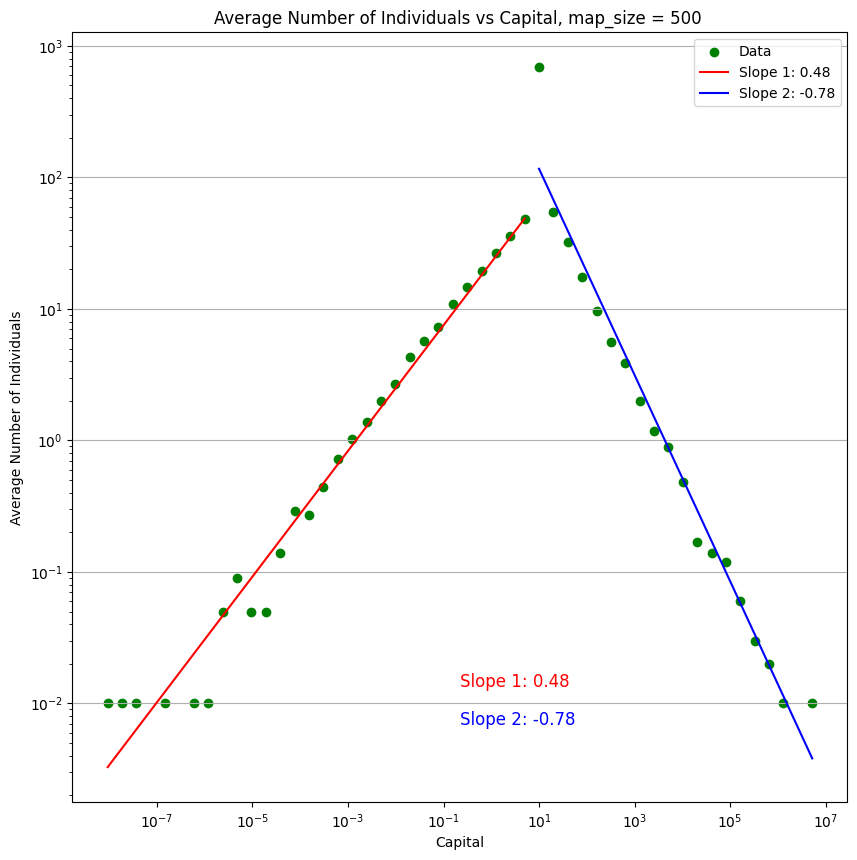

The calculated slope of Segment 1 is: 0.48
The calculated slope of Segment 2 is: -0.78


In [13]:
# # Plotting
# plt.figure(figsize=(10, 10))
# plt.scatter(x_values, y_values, color='green')
# plt.title('Average Number of Individuals vs Capital')
# plt.xlabel('Capital')
# plt.ylabel('Average Number of Individuals')
# plt.grid(axis='y')
# plt.xscale('log')
# plt.yscale('log')
# plt.show()
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming x_values and y_values are your data lists
# Convert them to NumPy arrays
x_values = np.array(x_values)
y_values = np.array(y_values)

# Finding the index closest to x = 10
split_index = np.abs(x_values - 10).argmin()

# Splitting the data based on the x value of 10
x_values_segment1 = x_values[:split_index]
y_values_segment1 = y_values[:split_index]

x_values_segment2 = x_values[split_index:]
y_values_segment2 = y_values[split_index:]

# Perform linear regression on the log-transformed data for both segments
slope1, intercept1, _, _, _ = linregress(np.log(x_values_segment1), np.log(y_values_segment1))
slope2, intercept2, _, _, _ = linregress(np.log(x_values_segment2), np.log(y_values_segment2))

# Plotting the log-log plot with data points
plt.figure(figsize=(10, 10))
plt.scatter(x_values, y_values, color='green', label='Data')
plt.title(f'Average Number of Individuals vs Capital, map_size = {MAP_SIZE} ')
plt.xlabel('Capital')
plt.ylabel('Average Number of Individuals')
plt.grid(axis='y')
plt.xscale('log')
plt.yscale('log')

# Plotting the linear regression lines for both segments
plt.plot(np.exp(np.log(x_values_segment1)), np.exp(intercept1) * x_values_segment1**slope1, 'r-', label=f'Slope 1: {slope1:.2f}')
plt.plot(np.exp(np.log(x_values_segment2)), np.exp(intercept2) * x_values_segment2**slope2, 'b-', label=f'Slope 2: {slope2:.2f}')

# Displaying the slope values as annotations on the plot
plt.text(0.5, 0.15, f"Slope 1: {slope1:.2f}", transform=plt.gca().transAxes, fontsize=12, color='red')
plt.text(0.5, 0.1, f"Slope 2: {slope2:.2f}", transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.legend()
plt.show()

print(f"The calculated slope of Segment 1 is: {slope1:.2f}")
print(f"The calculated slope of Segment 2 is: {slope2:.2f}")





